### take active matrix, during stimulus, take eigenspectrum slowest modes (vals near 0), project activity onto those modes
- look for way to show network is trying to "sum" the inputs



### Notes on drift diffusion:
- random walk until you hit a bound at $\pm B$
- "self excitation and lateral inhibition"



### analysis ideas:
- show that it is integrating (something about slow eigenmodes)
- see how the network responds to inputs outside of training
    - longer timescale for output
    - different length stimulus
- calculate fixed points across partitions, even outside of current partition



### training ideas:
- overtrain a lot to get more stable solution
- train using many more coherences
- decide on whether to use input/recurrent noise
- try fewer neurons

# Import

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sisyphus2.backend import analysis, visualizations, simulation_tools
from sisyphus2.backend.networks import Model
from sisyphus2.tasks import task

In [2]:
rdm = task.rdm2(stim_noise = 0.02, coherences = np.linspace(.01, .2, 100), rec_noise = .01, N_rec = 4)

In [3]:
gen = rdm.generate_train_trials()

In [4]:
params = rdm.__dict__


# Train

In [5]:
model = Model(params)
learning_rate = .001 
training_iters = 1000000
weights_path = '../weights/rdm_david.npz'
sess = tf.Session()
model.train(sess, gen, learning_rate = learning_rate, 
            training_iters = training_iters, weights_path = weights_path)
sess.close()

Iter 640, Minibatch Loss= 0.217881
Iter 1280, Minibatch Loss= 0.189126
Iter 1920, Minibatch Loss= 0.259342
Iter 2560, Minibatch Loss= 0.277244
Iter 3200, Minibatch Loss= 0.315416
Iter 3840, Minibatch Loss= 0.264762
Iter 4480, Minibatch Loss= 0.300350
Iter 5120, Minibatch Loss= 0.289558
Iter 5760, Minibatch Loss= 0.255668
Iter 6400, Minibatch Loss= 0.261338
Iter 7040, Minibatch Loss= 0.189240
Iter 7680, Minibatch Loss= 0.188836
Iter 8320, Minibatch Loss= 0.185514
Iter 8960, Minibatch Loss= 0.184278
Iter 9600, Minibatch Loss= 0.176909
Iter 10240, Minibatch Loss= 0.140883
Iter 10880, Minibatch Loss= 0.108497
Iter 11520, Minibatch Loss= 0.124729
Iter 12160, Minibatch Loss= 0.115080
Iter 12800, Minibatch Loss= 0.150623
Iter 13440, Minibatch Loss= 0.109736
Iter 14080, Minibatch Loss= 0.156957
Iter 14720, Minibatch Loss= 0.095313
Iter 15360, Minibatch Loss= 0.079749
Iter 16000, Minibatch Loss= 0.113815
Iter 16640, Minibatch Loss= 0.072872
Iter 17280, Minibatch Loss= 0.095219
Iter 17920, Minib

In [99]:
weights_path = '../weights/rdm_oscillating.npz'

# Generate Trials

In [56]:
weights_path = '../weights/rdm_david.npz'

In [20]:
sim = simulation_tools.Simulator(params, weights_path=weights_path)
dat = gen.next()
trial = dat[0][0,:,:]
result = dat[1][0,:,:]

In [17]:
trial = np.vstack((trial, np.zeros((1000,2))))

In [21]:
output,states = sim.run_trial(trial)

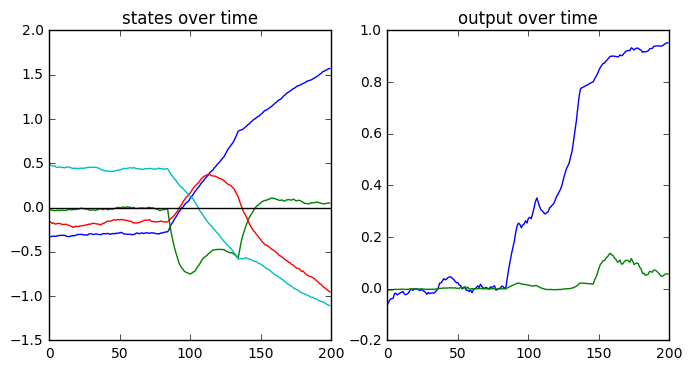

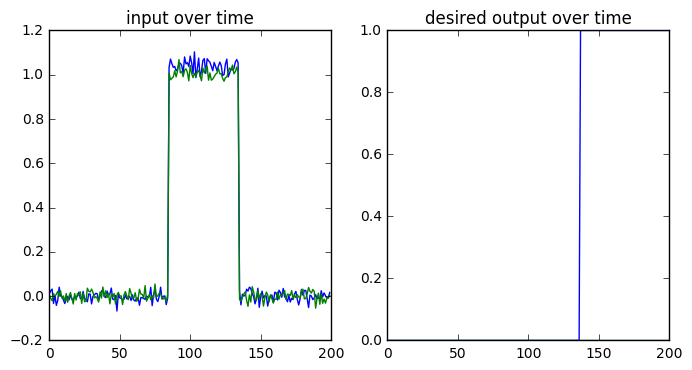

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(states[:,0,:])
plt.axhline(y=0, color='k')
plt.title("states over time")

plt.subplot(1,2,2)
plt.plot(output[:,0,:])
plt.title("output over time")
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(trial)
plt.title("input over time")

plt.subplot(1,2,2)
plt.plot(result)
plt.title("desired output over time")

plt.show()

In [11]:
analysis.hahnloser_fixed_point(sim, trial)

[-0.01899459  0.03423824]
[ 0.00494871  0.05842436]
[ 0.00727547  0.0038988 ]
[-0.01556532  0.02640908]
[-0.00847207  0.04499773]
[-0.0068024   0.03792615]
[-0.00612401  0.01298168]
[ 0.01897016  0.02037682]
[ 0.00142859  0.02270596]
[ 0.01327425  0.03499606]
[ 0.0267915   0.00990411]
[ 0.02160035 -0.01496321]
[ 0.01882252  0.0116196 ]
[-0.00577074  0.00039019]
[ 0.02508887 -0.00371354]
[-0.00438191  0.00847546]
[ 0.00349883  0.01188224]
[ 0.02179738  0.01097127]
[ 0.02184532 -0.00867284]
[ 0.02785529 -0.00021698]
[ 0.02768248 -0.02215046]
[ 0.03318938 -0.00310089]
[ 0.00153143 -0.03654497]
[ 0.00495899 -0.01904304]
[-0.03667823 -0.00119695]
[-0.02974583  0.01681295]
[ 0.00379718  0.00683392]
[ 0.00295271 -0.01620665]
[ 0.02363784 -0.01542685]
[-0.01343361 -0.00235005]
[ 0.01560912  0.0387621 ]
[ 0.01189524  0.00755203]
[-0.00584142  0.01973888]
[ 0.01906806  0.01760938]
[ 0.0183173  -0.01031141]
[-0.00086645  0.01785055]
[ 0.02784693  0.00916746]
[ 0.00154979  0.038968  ]
[-0.01036281

[array([ 0.67881057, -0.05687388,  0.69163078, -0.02885969, -1.54333863]),
 array([ 0.97274376, -0.11840724,  0.93088798, -0.01362755, -2.06753549]),
 array([ 0.54040156, -0.02930279,  0.57460084, -0.02697626, -1.26473025]),
 array([ 0.62939212, -0.04680718,  0.65053778, -0.02962248, -1.44889788]),
 array([ 0.80904291, -0.08413411,  0.79764795, -0.02213156, -1.77566616]),
 array([ 0.75856638, -0.07378333,  0.75588834, -0.02335283, -1.68075453]),
 array([ 0.55919835, -0.03267942,  0.59163783, -0.02960355, -1.31088699]),
 array([ 0.72176969, -0.06715609,  0.72258993, -0.01832019, -1.5907857 ]),
 array([ 0.66889373, -0.05559184,  0.68108909, -0.02425253, -1.50768672]),
 array([ 0.8169417 , -0.0865769 ,  0.80162281, -0.01663207, -1.77189482]),
 array([ 0.66889368, -0.05654036,  0.6781389 , -0.01813483, -1.48622373]),
 array([ 0.44614262, -0.01039306,  0.49531614, -0.02655364, -1.07801032]),
 array([ 0.6501998 , -0.05238582,  0.66367217, -0.02065845, -1.45834027]),
 array([ 0.45860554, -0.0

In [21]:
sim.W_rec

array([[ 0.42985362,  0.95787883,  0.61726564,  1.06212366,  1.23925114],
       [-0.07207593, -0.06068306, -0.18786789,  0.70896161,  1.19040501],
       [ 0.74452722, -2.24787903,  0.03721447, -1.01455069,  0.51532233],
       [ 0.09124842,  0.28118303, -0.11271862,  0.58928925,  1.00101578],
       [-1.02137744, -0.02606249, -1.01472473,  0.69770181, -0.20490065]], dtype=float32)

In [65]:
sim.W_out

array([[ 0.14760181, -1.80095565, -1.66495442]], dtype=float32)

# Daniel's old tests (only noise input, etc)

In [11]:
def plot_response_test(sim, x_test):
    
    n_trials = x_test.shape[0]
    choice = np.zeros(n_trials)
    resp = np.zeros(n_trials)

    for ii in range(n_trials):
        o,s = sim.run_trial(x_test[ii,:,:])
        resp[ii] = o[-1,0,:]
        choice[ii] = np.sign(resp[ii])
        
    mean_up = np.mean(x_test[choice==1,:,:],axis=0)
    mean_down = np.mean(x_test[choice==-1,:,:],axis=0)
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(mean_up)
    plt.title('Average Up')
    plt.subplot(1,2,2)
    plt.plot(mean_down)
    plt.title('Average Down')
    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.bar([0,1],[np.mean(choice==1),np.mean(choice==-1)])
    plt.xticks([.35,1.45],['Up','Down'])
    plt.xlabel('Percent Up')
    plt.subplot(1,2,2)
    plt.hist(resp,20)
    plt.title('Response Histogram')
    plt.show()
    
    return mean_up,mean_down,choice,resp

def coherence_test(sim,cohs = [.2,.1,.05,.04,.02],n_hidden=10,sigma_in = 0):
    
    n_cohs = len(cohs)
    a = np.zeros([200,1])
    a[40:140] = 1
    o = np.zeros([200,n_cohs])
    s = np.zeros([200,n_hidden,n_cohs])
    ev = np.zeros([200,n_cohs])
    for ii,coh in enumerate(cohs): 
        inp = coh*a + sigma_in*np.random.randn(len(a),1)
        o_temp,s_temp = sim.run_trial(inp,t_connectivity=False)
        o[:,ii] = o_temp[:,0,:].flatten()
        s[:,:,ii] = s_temp[:,0,:]
        ev[:,ii] = np.cumsum(coh*a)

    
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.plot(o)
    plt.title('output')
    
    plt.subplot(1,2,2)
    plt.plot(ev)
    plt.title('sum of evidence')
    
    plt.show()
    
    return o,s

In [12]:
a = plot_response_test(sim, dat[0])
b = coherence_test(sim, cohs = np.linspace(-.2, .2, 20), n_hidden = 3)

ValueError: setting an array element with a sequence.

# Distance to fixed point

In [19]:
def distance_to_fixed(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))

    dists = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
        
        #find fixed point at this time step
        # (even if it is outside the current partition)
        fixed_point = -1 * np.matmul(np.linalg.inv(Wp), sim.b_rec + input_mat[:,i])
        
        #calculate distance to fixed point
        d = np.linalg.norm(fixed_point - s)
        dists.append(d)
                       
    # plot results      
    plt.plot(dists)
    plt.title('distance to fixed point')
    plt.show()
    plt.plot(states[:,0,:])
    plt.axhline(y=0, color='k')
    plt.title('states')
    plt.show()
    plt.plot(np.transpose(input_mat))
    plt.title('input')
    plt.show()

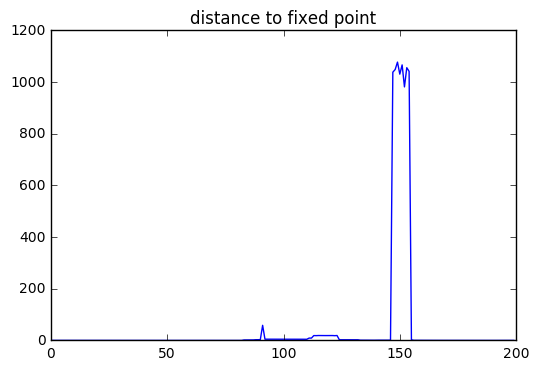

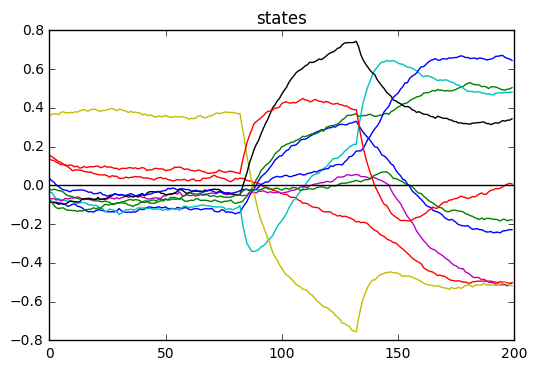

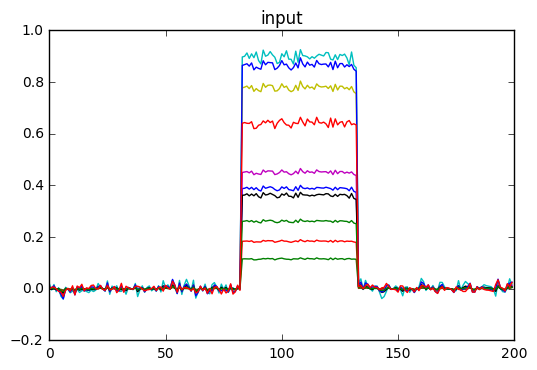

In [20]:
distance_to_fixed(sim, trial)

# Slow modes?

In [15]:
def slow_modes_analysis(sim, trial):
    outputs, states = sim.run_trial(trial)

    input_mat = np.matmul(np.absolute(sim.W_in), np.transpose(trial))

    #set identity matrix of proper size
    identity = np.diag(np.ones(sim.N_rec))
    

    proj = []
    for i, s in enumerate(states):
        # define active weight matrix
        Wp = np.copy(sim.W_rec)
        for index in range(sim.N_rec):
            if s[0,index] < 0:
                Wp[:, index] = 0
        Wp = Wp - identity
                
        #find slowest eigenmode
        vals, vecs = np.linalg.eig(Wp)
        slow_idx = np.argmin(np.real(vals))
        
        if i == 1:
            print vals
            print vecs
        
        slow_val = vals[slow_idx]
        slow_vec = vecs[:,slow_idx]
        
        #project onto the slow mode
        projected_state = np.dot(s, slow_vec)/np.linalg.norm(slow_vec)
        proj.append(projected_state)
        
    
    plt.plot(proj)
    plt.title('slow mode')
    plt.show()
    plt.plot(states[:,0,:])
    plt.axhline(y=0, color='k')
    plt.title('states')
    plt.show()
    plt.plot(np.transpose(input_mat))
    plt.title('input')
    plt.show()

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


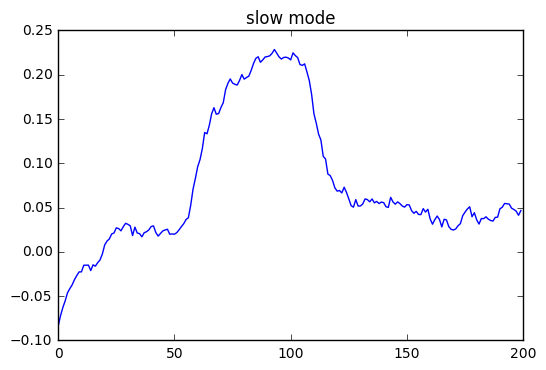

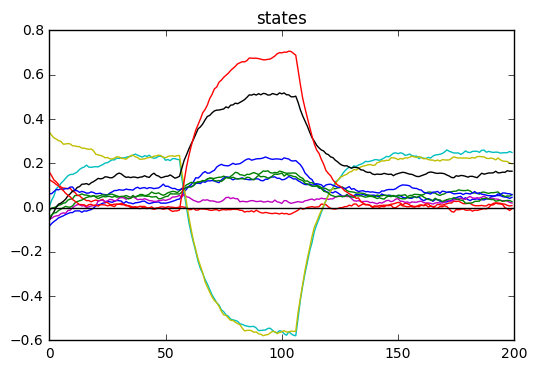

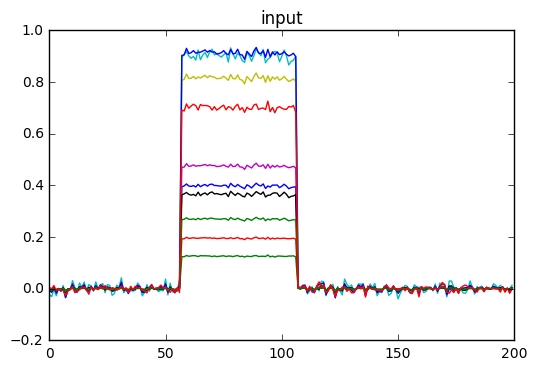

In [16]:
slow_modes_analysis(sim, trial)

In [36]:
sim.W_rec

array([[-0.        ,  0.48333243, -0.27838606],
       [ 1.15871501, -0.        ,  0.89962065],
       [-2.52069807,  1.13063204,  0.        ]], dtype=float32)

In [46]:
W = sim.W_rec - np.diag(np.ones(3))

In [77]:
np.linalg.eig(W / sim.tau)

(array([-0.02762825+0.j        , -0.00118588+0.00227491j,
        -0.00118588-0.00227491j]),
 array([[ 0.27921188+0.j        ,  0.21182608-0.19071858j,
          0.21182608+0.19071858j],
        [-0.57571546+0.j        ,  0.73197567+0.j        ,  0.73197567-0.j        ],
        [ 0.76850012+0.j        ,  0.44432776+0.43074424j,
          0.44432776-0.43074424j]]))

In [49]:
-1 * np.matmul(np.linalg.inv(W), sim.b_rec)

array([ 0.15813331,  0.26286239,  0.4949867 ])